In [3]:
from jenga.tasks.shoes import ShoeCategorizationTask
from jenga.corruptions.image import GaussianNoiseCorruption, MotionBlurCorruption, FogCorruption, BrightnessCorruption

from jenga.evaluation.corruption_impact import CorruptionImpactEvaluator

import matplotlib.pyplot as plt

import imgaug.augmenters as iaa

### Instantiate the shoe categorization task and train a baseline model

In [6]:
task = ShoeCategorizationTask(seed=42)

baseline_model = task.fit_baseline_model(task.train_data, task.train_labels)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
12000/12000 [==============================] - 10s 814us/sample - loss: 0.1644 - acc: 0.9372


### Train another model on data augmented with gaussian noise corruptions 

In [17]:
import numpy as np

augmented_data = [task.train_data]
augmented_labels= [task.train_labels]

for severity in range(1, 6):
    indexes = np.random.choice(range(0, len(task.train_data)), 2400)
    sample = task.train_data[indexes, :, :].copy()
    corrupted_sample = GaussianNoiseCorruption(fraction=1.0, severity=severity).transform(sample)
    augmented_data.append(corrupted_sample)
    augmented_labels.append(task.train_labels[indexes].copy())

gaussian_noise_model = task.fit_baseline_model(np.concatenate(augmented_data), 
                                               np.concatenate(augmented_labels))


24000/24000 [==============================] - 19s 795us/sample - loss: 0.1743 - acc: 0.9320


### Evaluate how well both models can handle corrupted test data

In [26]:
evaluator = CorruptionImpactEvaluator(task)

corruptions  = []
for fraction in [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.99]:
    corruptions.append(GaussianNoiseCorruption(fraction=fraction, severity=4))
    
gaussian_noise_results = evaluator.evaluate(baseline_model, 10, *corruptions)        
gaussian_noise_results_aug = evaluator.evaluate(gaussian_noise_model, 10, *corruptions)    

0/70 (1.2847792579999577)
10/70 (14.532573447000004)
20/70 (28.05752479499995)
30/70 (41.72997969200003)
40/70 (57.11645849699994)
50/70 (75.35954133199994)
60/70 (97.178706035)
0/70 (1.347551156999998)
10/70 (14.527781118000007)
20/70 (28.30074635299991)
30/70 (42.859293444999935)
40/70 (59.41289984699995)
50/70 (79.21683312499988)
60/70 (102.283084003)


### Train another model on data augmented with motion blur corruptions 

In [31]:
import numpy as np

augmented_data = [task.train_data]
augmented_labels= [task.train_labels]

for severity in range(1, 6):
    indexes = np.random.choice(range(0, len(task.train_data)), 2400)
    sample = task.train_data[indexes, :, :].copy()
    corrupted_sample = MotionBlurCorruption(fraction=1.0, severity=severity).transform(sample)
    augmented_data.append(corrupted_sample)
    augmented_labels.append(task.train_labels[indexes].copy())

motion_blur_model = task.fit_baseline_model(np.concatenate(augmented_data), 
                                            np.concatenate(augmented_labels))

24000/24000 [==============================] - 21s 893us/sample - loss: 0.1849 - acc: 0.9287


### Evaluate how well both models can handle corrupted test data

In [32]:
evaluator = CorruptionImpactEvaluator(task)

corruptions  = []
for fraction in [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.99]:
    corruptions.append(MotionBlurCorruption(fraction=fraction, severity=4))
    
motion_blur_results = evaluator.evaluate(baseline_model, 10, *corruptions)        
motion_blur_results_aug = evaluator.evaluate(motion_blur_model, 10, *corruptions)    

0/70 (1.3703467410000485)
10/70 (15.284386611000173)
20/70 (30.684287897000104)
30/70 (48.72375020000004)
40/70 (74.17361031700011)
50/70 (110.53904216800015)
60/70 (158.71888121000006)
0/70 (1.4039356020000469)
10/70 (15.96078083600014)
20/70 (32.882850898000015)
30/70 (52.45016925300001)
40/70 (79.15669746200001)
50/70 (121.79098427300005)
60/70 (179.29485117500008)


### Train another model on data augmented with fog corruptions 

In [34]:
import numpy as np

augmented_data = [task.train_data]
augmented_labels= [task.train_labels]

for severity in range(1, 6):
    indexes = np.random.choice(range(0, len(task.train_data)), 2400)
    sample = task.train_data[indexes, :, :].copy()
    corrupted_sample = FogCorruption(fraction=1.0, severity=severity).transform(sample)
    augmented_data.append(corrupted_sample)
    augmented_labels.append(task.train_labels[indexes].copy())

fog_model = task.fit_baseline_model(np.concatenate(augmented_data), 
                                    np.concatenate(augmented_labels))

24000/24000 [==============================] - 21s 892us/sample - loss: 0.2136 - acc: 0.9153


### Evaluate how well both models can handle corrupted test data

In [35]:
evaluator = CorruptionImpactEvaluator(task)

corruptions  = []
for fraction in [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.99]:
    corruptions.append(FogCorruption(fraction=fraction, severity=4))
    
fog_results = evaluator.evaluate(baseline_model, 10, *corruptions)        
fog_results_aug = evaluator.evaluate(fog_model, 10, *corruptions)   

0/70 (1.423894756999971)
10/70 (15.696370415000047)
20/70 (31.034642675999976)
30/70 (48.04386349100014)
40/70 (70.02736273000005)
50/70 (99.84909411100011)
60/70 (137.528195655)
0/70 (1.4158151739998175)
10/70 (15.919078420000005)
20/70 (31.708150871999806)
30/70 (50.30666460399971)
40/70 (73.26962379399993)
50/70 (103.47567294400005)
60/70 (142.1722545990001)


### Plot the results

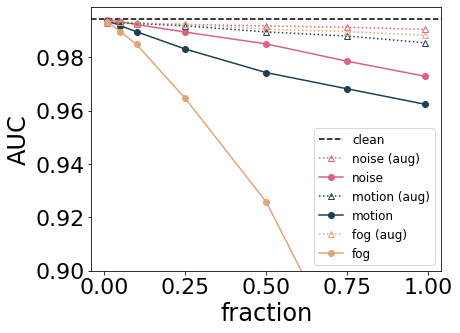

In [43]:
def as_series(results):
    medians = []
    for result in results:
        medians.append(np.median(result.corrupted_scores))
    return medians

ax = plt.gca()        

fractions = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.99]
markersize=6

l = ax.axhline(gaussian_noise_results[0].baseline_score, linestyle='--', color='black')    

plt.plot(fractions, as_series(gaussian_noise_results_aug), color='#dc6082', linestyle='dotted', 
         marker='^', markersize=markersize, fillstyle='none')
plt.plot(fractions, as_series(gaussian_noise_results), color='#dc6082', 
         marker='o', markersize=markersize)

plt.plot(fractions, as_series(motion_blur_results_aug), color='#1e4052', linestyle='dotted', 
         marker='^', markersize=markersize, fillstyle='none')
plt.plot(fractions, as_series(motion_blur_results), color='#1e4052', 
         marker='o', markersize=markersize)

plt.plot(fractions, as_series(fog_results_aug), color='#e1a677', linestyle='dotted', 
         marker='^', markersize=markersize, fillstyle='none')
plt.plot(fractions, as_series(fog_results), color='#e1a677', 
         marker='o', markersize=markersize)


ax.set_ylim((0.9, 0.999))
ax.tick_params(axis='both', which='major', labelsize=22)
ax.tick_params(axis='both', which='minor', labelsize=22)    
ax.set_ylabel('AUC', fontsize=24)
ax.set_xlabel('fraction', fontsize=24)
    
ax.legend(['clean', 'noise (aug)', 'noise', 'motion (aug)', 'motion', 'fog (aug)', 'fog'], 
          fontsize=12)    
    
plt.tight_layout()
plt.gcf().set_size_inches(7, 5)

plt.show()